# Plots in the Latest Version of the Manuscript

[![Manuscript Version](https://img.shields.io/badge/manuscript-v3.5-red?style=for-the-badge)](https://doi.org/10.1103/PhysRevA.107.013525)
[![Toolbox Version](https://img.shields.io/badge/qom-v1.0.1-red?style=for-the-badge)](https://sampreet.github.io/qom-docs/v1.0.1)

## Dependencies

In [1]:
# dependencies
import numpy as np
import os 
import sys

# qom modules
from qom.ui import init_log
from qom.ui.plotters import MPLPlotter
from qom.utils.solvers import get_func_stability_zone
from qom.utils.loopers import wrap_looper

# add path to local libraries
sys.path.append(os.path.abspath(os.path.join('../..')))
# import system
from systems.BoseEinsteinCondensate import BEC_10

# initialize logger
init_log()

MainThread               INFO    2024-01-18 22:58:54.306: (qom.ui.log) -------------------------------------------------Logger Initialized


## Figure 2

(a) Bistability plot for $\tilde{g} = 0$ (solid blue curve) and $\tilde{g} = 12 \tilde{g}_{m}$ (dotted black curve).
(b) Stable (s) and unstable (u) regions of the system, according to the Routh-Hurwitz criterion mentioned in
the text.
All plots are obtained at $\tilde{\Delta} = − \Omega_{m}$.

MainThread               INFO    2024-01-18 22:58:54.321: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:58:54.339: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


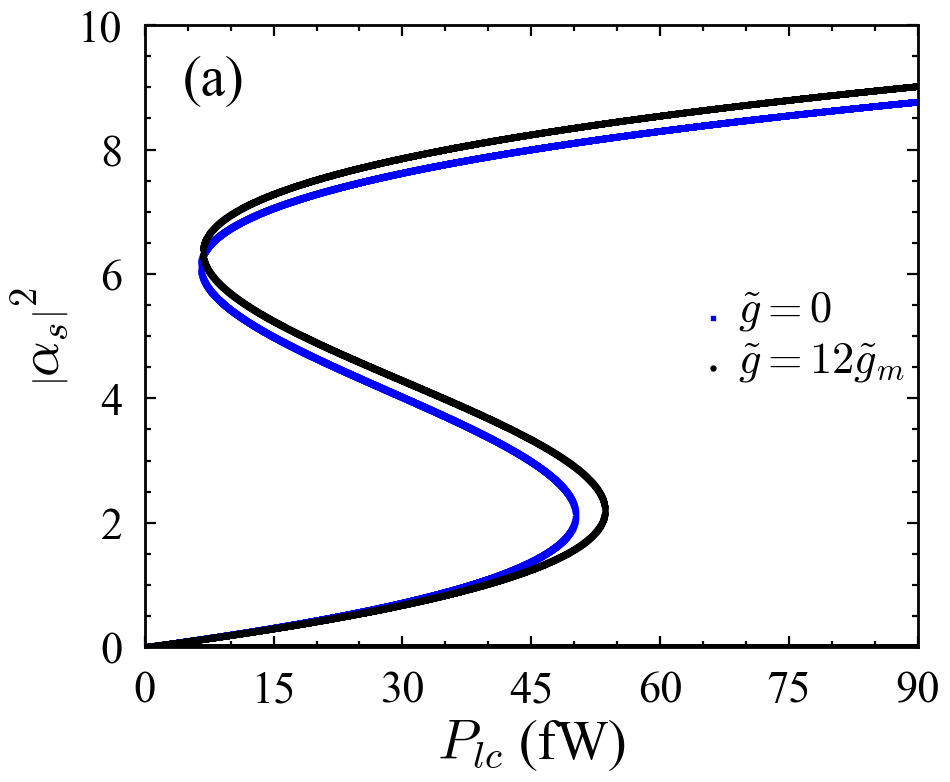

In [2]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/2a',
        'X'                 : {
            'var'   : 'P_lc',
            'min'   : 0.0,
            'max'   : 90e-15,
            'dim'   : 9001,
            'scale' : 'linear'
        },
        'Y'                 : {
            'var'   : 'g_tilde_norm',
            'val'   : [0.0, 12.0]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 0,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'cubic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'scatters',
        'colors'            : ['b', 'k'],
        'sizes'             : [10, 50],
        'styles'            : ['s', '.'],
        'x_label'           : '$P_{lc}$ (fW)',
        'x_tick_labels'     : [i * 15 for i in range(7)],
        'x_tick_pad'        : 16,
        'x_ticks'           : [i * 15e-15 for i in range(7)],
        'x_ticks_minor'     : [i * 5e-15 for i in range(19)],
        'v_label'           : '$\\left| \\alpha_{s} \\right|^{2}$',
        'v_tick_pad'        : 16,
        'v_ticks'           : [i * 2 for i in range(6)],
        'v_ticks_minor'     : [i * 0.5 for i in range(21)],
        'show_legend'       : True,
        'legend_labels'     : ['$\\tilde{g} = 0$', '$\\tilde{g} = 12 \\tilde{g}_{m}$', '$\\tilde{g} = 40 \\tilde{g}_{m}$'],
        'legend_location'   : 'center right',
        'label_font_size'   : 40.0,
        'legend_font_size'  : 32.0,
        'tick_font_size'    : 32.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.19, 0.86)
        }]
    }
}

# function to obtain the mean optical occupancies
def func_moo(system_params):
    # intialize system
    system = BEC_10(
        params=system_params
    )
    # get mean optical occupancies
    N_os = system.get_mean_optical_occupancies()

    return N_os

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_moo,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

MainThread               INFO    2024-01-18 22:58:55.289: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:58:55.394: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


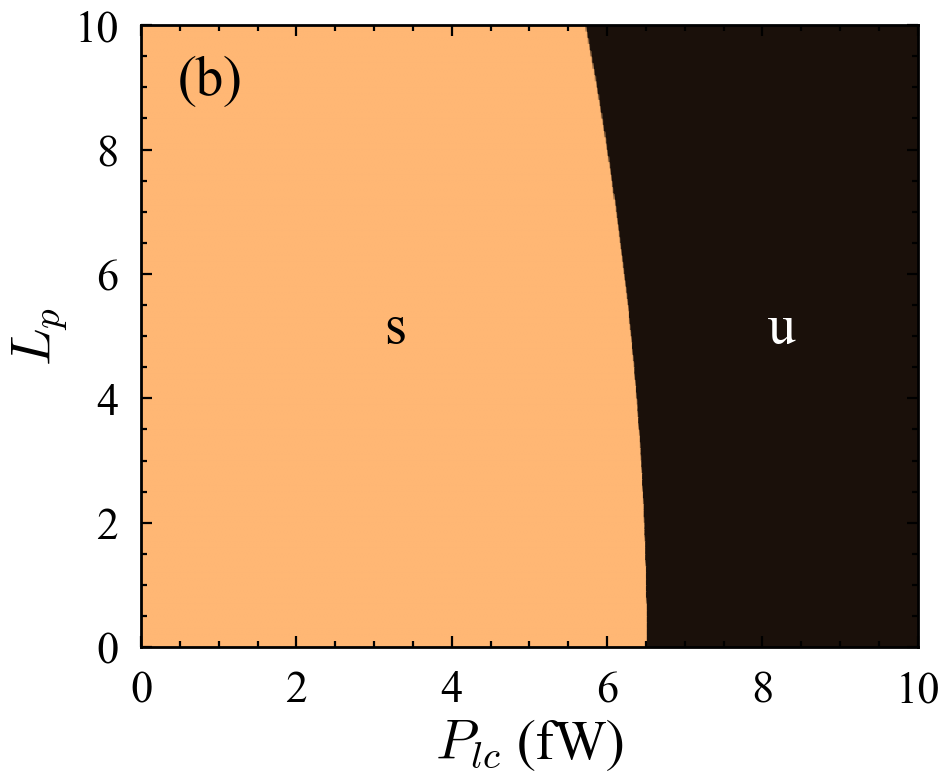

In [3]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/2b',
        'X'                 : {
            'var'   : 'P_lc',
            'min'   : 0.0,
            'max'   : 10e-15,
            'dim'   : 1001,
            'scale' : 'linear'
        },
        'Y'                 : {
            'var'   : 'L_p',
            'min'   : 0,
            'max'   : 10,
            'dim'   : 101,
            'scale' : 'linear'
        }
    },
    'solver': {
        'show_progress'         : False,
        'use_system_method'     : True,
        'system_measure_name'   : 'coeffs_A'
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'cubic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'pcolormesh',
        'palette'           : 'copper_r',
        'x_label'           : '$P_{lc}$ (fW)',
        'x_tick_labels'     : [i * 2 for i in range(6)],
        'x_tick_pad'        : 16,
        'x_ticks'           : [i * 2e-15 for i in range(6)],
        'x_ticks_minor'     : [i * 0.5e-15 for i in range(21)],
        'y_label'           : '$L_{p}$',
        'y_tick_pad'        : 16,
        'y_ticks'           : [i * 2 for i in range(6)],
        'y_ticks_minor'     : [i * 0.5 for i in range(21)],
        'v_ticks'           : [5, 9],
        'label_font_size'   : 40.0,
        'tick_font_size'    : 32.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'annotations'       : [{
            'text'      : '(b)',
            'xy'        : (0.185, 0.86)
        }, {
            'text'      : 's',
            'xy'        : (0.4, 0.55),
            'color'     : 'k',
            'font_dict' : 'tick'
        }, {
            'text'      : 'u',
            'xy'        : (0.8, 0.55),
            'color'     : 'w',
            'font_dict' : 'tick'
        }],
    }
}

# function to obtain the stability zone
def func_stability_zone(system_params):
    # return function
    return get_func_stability_zone(
        SystemClass=BEC_10,
        params=params['solver'],
        steady_state=True,
        use_rhc=False
    )(
        system_params=system_params
    )

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_stability_zone,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 3

Transmission of the probe field for $L_{p} = 0$ obtained at $\tilde{\Delta} = − \Omega_{m}$.
For this case the critical power is $\tilde{P}_{lc_{cr}} = 28$ fW.

MainThread               INFO    2024-01-18 22:58:56.964: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:58:56.975: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


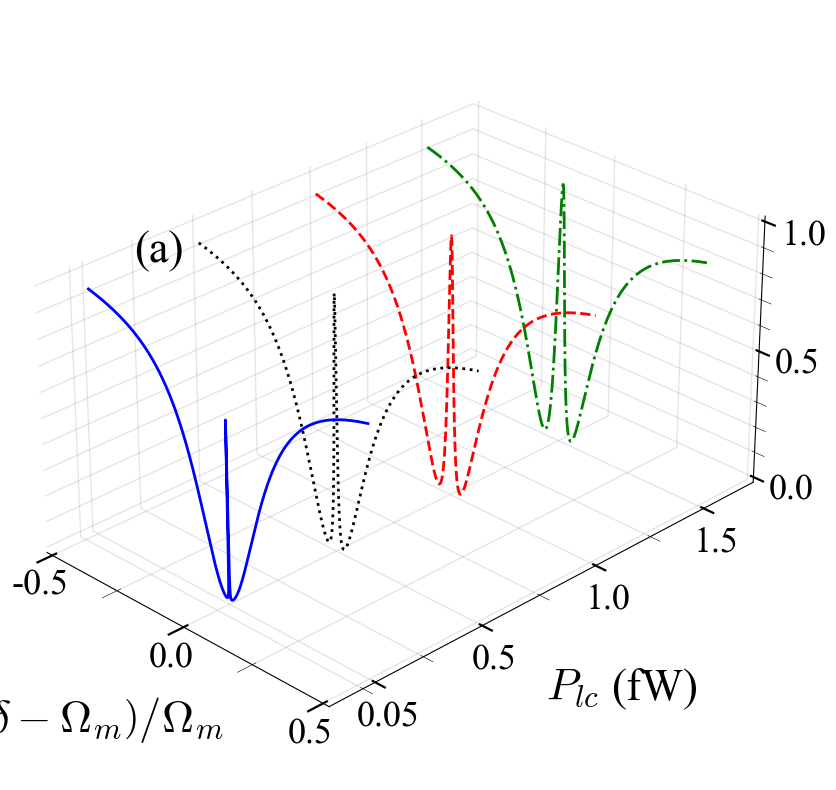

In [4]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/3a',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.5,
            'max'   : 0.5,
            'dim'   : 10001
        },
        'Y'                 : {
            'var'   : 'P_lc',
            'val'   : [1.5e-15, 1.0e-15, 0.5e-15, 0.05e-15]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 0,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'cubic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines_3d',
        'colors'            : ['g', 'r', 'k', 'b'],
        'sizes'             : [2] * 4,
        'styles'            : ['-.', '--', ':', '-'],
        'x_label_pad'       : 32,
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_pad'        : 0,
        'x_ticks'           : [-0.5, 0.0, 0.5],
        'x_ticks_minor'     : [i * 0.25 - 0.5 for i in range(5)],
        'y_label_pad'       : 48,
        'y_label'           : '$P_{lc}$ (fW)',
        'y_limits'          : [-0.1e-15, 1.7e-15],
        'y_tick_labels'     : [0.05, 0.5, 1.0, 1.5],
        'y_tick_pad'        : 4,
        'y_ticks'           : [0.05e-15, 0.5e-15, 1.0e-15, 1.5e-15],
        'y_ticks_minor'     : [0.0, 0.25e-15, 0.75e-15, 1.25e-15],
        'v_label_pad'       : 20,
        'v_label'           : '$T$',
        'v_tick_pad'        : 8,
        'v_ticks'           : [0.0, 0.5, 1.0],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'view_aspect'       : [1.0, 1.5, 0.75],
        'view_elevation'    : 28,
        'view_rotation'     : -45,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.14, 0.66)
        }]
    }
}

# function to obtain the transmission
def func_transmission(system_params):
    # intialize system
    system = BEC_10(
        params=system_params
    )
    _, _, c = system.get_ivc()
    # return transmission
    return system.get_transmission(
        c=c
    )

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 4

Transmission $T$ (black, left axis) of the probe field at $\delta = \Omega_{m}$ and width of the OMIT window $\Gamma_{m}$ (blue, right axis) as a function of control field power.
Here the solid circles represent the numerical values of the transmission and linewidth obtained from Figure 3(a).
The solid curves represent the analytical solutions from Equations (9) and (10).
The rest of the parameters are the same as in Figure 3.

MainThread               INFO    2024-01-18 22:58:57.307: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:03.058: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	
MainThread               INFO    2024-01-18 22:59:03.732: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:03.789: (qom.loopers.XLooper) ------------------------------------------Results Obtained	
MainThread               INFO    2024-01-18 22:59:03.790: (qom.loopers.XLooper) ----------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:03.840: (qom.loopers.XLooper) ------------------------------------------Results Obtained	


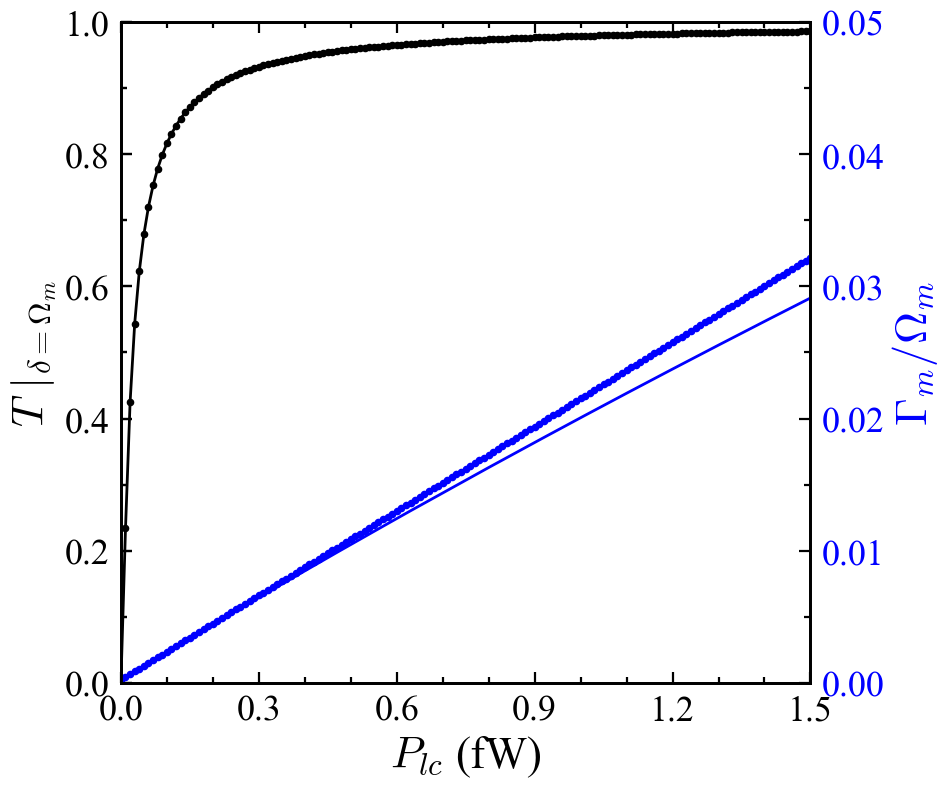

In [5]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'X'             : {
            'var'   : 'delta',
            'min'   : -0.2,
            'max'   : 0.2,
            'dim'   : 400001
        },
        'Y'             : {
            'var'   : 'P_lc',
            'min'   : 0.0e-15,
            'max'   : 1.5e-15,
            'dim'   : 151
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 0,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'res',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['k', 'b'],
        'sizes'             : [2] * 2,
        'styles'            : ['-'] * 2,
        'x_label'           : '$P_{lc}$ (fW)',
        'x_tick_labels'     : [0.0, 0.3, 0.6, 0.9, 1.2, 1.5],
        'x_ticks'           : [i * 0.3e-15 for i in range(6)],
        'x_ticks_minor'     : [i * 0.1e-15 for i in range(16)],
        'v_label'           : '$T ~ |_{\\delta = \\Omega_{m}}$',
        'v_label_color'     : 'k',
        'v_tick_labels'     : ['{:0.1f}'.format(i * 0.2) for i in range(6)],
        'v_ticks'           : [i * 0.2 for i in range(6)],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'v_twin_label'      : '$\\Gamma_{m} / \\Omega_{m}$',
        'v_twin_label_color': 'b',
        'v_twin_tick_color' : 'b',
        'v_twin_tick_labels': ['{:0.2f}'.format(i * 0.01) for i in range(6)],
        'v_twin_ticks'      : [i * 0.01 for i in range(6)],
        'v_twin_ticks_minor': [i * 0.005 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0
    }
}

# function to obtain the transmission at resonance
def func_transmission_resonance(system_params):
    # initialize system
    system = BEC_10(
        params=system_params
    )
    # extract parameters
    _, _, c = system.get_ivc()
    # return transmission
    return system.get_transmission_resonance(
        c=c
    )

# function to obtain the normalized FWHM at resonance
def func_fwhm_norm_resonance(system_params):
    # initialize system
    system = BEC_10(
        params=system_params
    )
    # extract parameters
    _, _, c = system.get_ivc()
    # return transmission
    return system.get_fwhm_norm_resonance(
        c=c
    )

# looper for transmission
params['looper']['file_path_prefix'] = '../../data/v3.5_qom-v1.0.1/4'
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system']
)

# extract axes
xs = looper.axes['X']['val']
ys = looper.axes['Y']['val']
vs = looper.results['V']
# calculate maximum transmission
Ts_maxi = [0]
for i in range(1, len(vs)):
    Ts = vs[i]
    dim = len(Ts)
    k = int(dim / 2) + 1 if dim % 2 == 0 else int(dim / 2)
    # locate change of derivative from positive to negative from center
    while k <= dim - 2:
        if Ts[k] - Ts[k - 1] >= 0 and Ts[k + 1] - Ts[k] <= 0:
            Ts_maxi.append(Ts[k])
            break
        if Ts[- k - 1] - Ts[- k] >= 0 and Ts[- k - 2] - Ts[- k - 1] <= 0:
            Ts_maxi.append(Ts[- k - 1])
            break
        k += 1

# calculate transmission at resonance
Ts_reso = [v[int(len(v) / 2)] for v in vs]

# calculate normailzed FWHM
Gamma_ms_reso = [0]
for i in range(1, len(vs)):
    Ts = vs[i]
    dim = len(Ts)
    mid = int(dim / 2) + 1 if dim % 2 == 0 else int(dim / 2)
    k = mid
    # locate half maxima
    idxs = list()
    flags = [0, 0]
    while k <= dim - 2 and len(idxs) < 2:
        if Ts[k] <= Ts_reso[i] / 2 and flags[1] == 0:
            idxs.append(k)
            flags[1] = 1
        if Ts[- k - 1] <= Ts_reso[i] / 2 and flags[0] == 0:
            idxs.append(- k - 1)
            flags[0] = 1
        k += 1
    Gamma_ms_reso.append(np.abs(xs[idxs[-1]] - xs[idxs[0]]))

# looper for transmission at resonance
looper_Ts_reso = wrap_looper(
    looper_name='XLooper',
    func=func_transmission_resonance,
    params={
        'show_progress' : True,
        'X'             : params['looper']['Y']
    },
    params_system=params['system']
)
Ts_reso_expr = looper_Ts_reso.results['V']

# looper for normalized FWHM at resonance
looper_Gamma_ms_reso = wrap_looper(
    looper_name='XLooper',
    func=func_fwhm_norm_resonance,
    params={
        'show_progress' : True,
        'X'             : params['looper']['Y']
    },
    params_system=params['system']
)
Gamma_ms_reso_expr = looper_Gamma_ms_reso.results['V']

# plotter
plotter = MPLPlotter(axes={
    'X': ys
}, params=params['plotter'])
plotter.update(
    vs=Ts_maxi,
    xs=ys
)
plotter.add_scatter(
    vs=Ts_reso_expr,
    xs=ys,
    color='k',
    size=20,
    style='o'
)
plotter.update_twin_axis(
    vs=Gamma_ms_reso,
    xs=ys
)
plotter.add_scatter(
    vs=Gamma_ms_reso_expr,
    xs=ys,
    color='b',
    size=20,
    style='o'
)
plotter.show()

## Figure 5

(a) Probe transmission as a function of pump-probe detuning and control field power for $L_{p} = 1$.
For this case the critical power is $\tilde{P}_{lc_{cr}} = 33$ fW.
(b) Transmission of the probe field as a function of the winding number and pump-probe detuning for
$P_{lc} = 1$ fW.

MainThread               INFO    2024-01-18 22:59:05.603: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:05.609: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


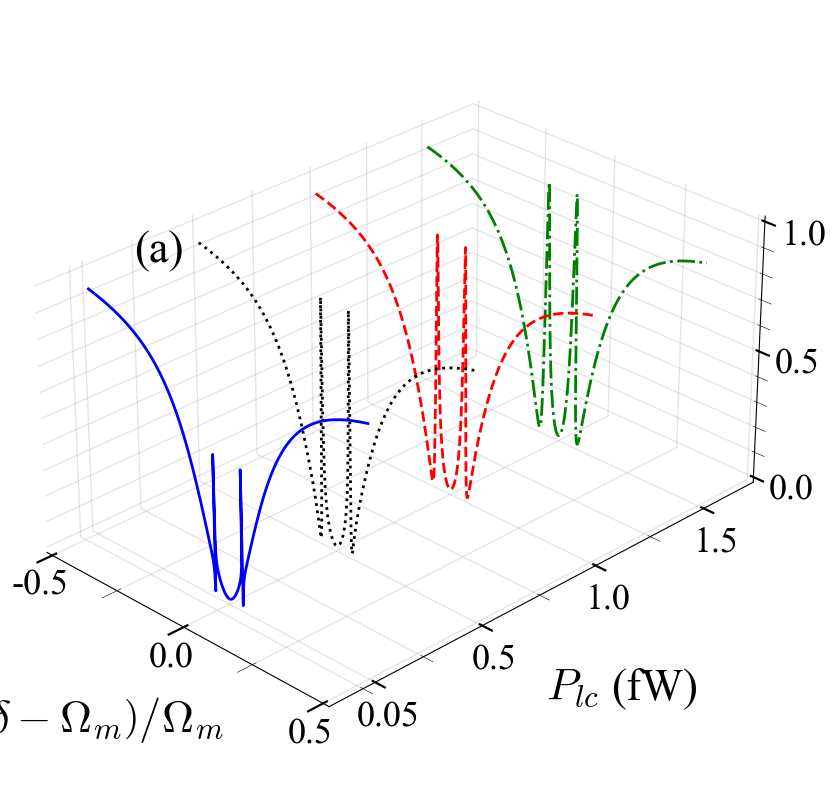

In [6]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/5a',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.5,
            'max'   : 0.5,
            'dim'   : 10001
        },
        'Y'                 : {
            'var'   : 'P_lc',
            'val'   : [1.5e-15, 1e-15, 0.5e-15, 0.05e-15]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines_3d',
        'colors'            : ['g', 'r', 'k', 'b'],
        'sizes'             : [2] * 4,
        'styles'            : ['-.', '--', ':', '-'],
        'x_label_pad'       : 32,
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_pad'        : 0,
        'x_ticks'           : [-0.5, 0.0, 0.5],
        'x_ticks_minor'     : [i * 0.25 - 0.5 for i in range(5)],
        'y_label_pad'       : 48,
        'y_label'           : '$P_{lc}$ (fW)',
        'y_limits'          : [-0.1e-15, 1.7e-15],
        'y_tick_labels'     : [0.05, 0.5, 1.0, 1.5],
        'y_tick_pad'        : 4,
        'y_ticks'           : [0.05e-15, 0.5e-15, 1.0e-15, 1.5e-15],
        'y_ticks_minor'     : [0.0, 0.25e-15, 0.75e-15, 1.25e-15],
        'v_label_pad'       : 20,
        'v_label'           : '$T$',
        'v_tick_pad'        : 8,
        'v_ticks'           : [0.0, 0.5, 1.0],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'view_aspect'       : [1.0, 1.5, 0.75],
        'view_elevation'    : 28,
        'view_rotation'     : -45,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.14, 0.66)
        }]
    }
}

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

MainThread               INFO    2024-01-18 22:59:06.050: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:06.058: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


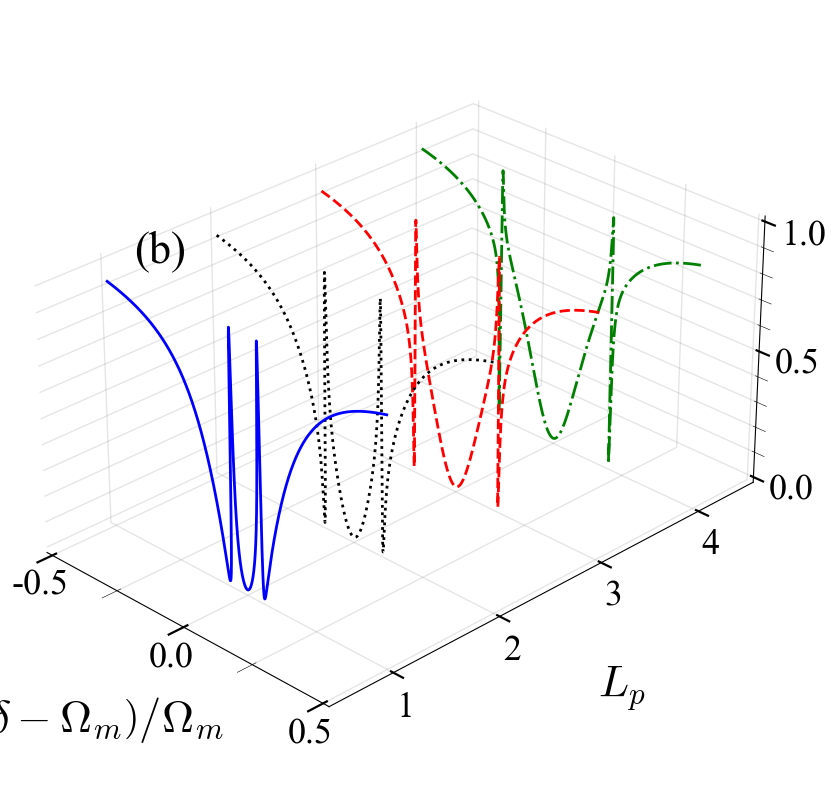

In [7]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/5b',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.5,
            'max'   : 0.5,
            'dim'   : 10001
        },
        'Y'                 : {
            'var'   : 'L_p',
            'val'   : [4, 3, 2, 1]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines_3d',
        'colors'            : ['g', 'r', 'k', 'b'],
        'sizes'             : [2] * 4,
        'styles'            : ['-.', '--', ':', '-'],
        'x_label_pad'       : 32,
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_pad'        : 0,
        'x_ticks'           : [-0.5, 0.0, 0.5],
        'x_ticks_minor'     : [i * 0.25 - 0.5 for i in range(5)],
        'y_label_pad'       : 48,
        'y_label'           : '$L_{p}$',
        'y_limits'          : [0.5, 4.5],
        'y_tick_labels'     : [1, 2, 3, 4],
        'y_tick_pad'        : 4,
        'y_ticks'           : [1, 2, 3, 4],
        'y_ticks_minor'     : [1, 2, 3, 4],
        'v_label_pad'       : 20,
        'v_label'           : '$T$',
        'v_tick_pad'        : 8,
        'v_ticks'           : [0.0, 0.5, 1.0],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'view_aspect'       : [1.0, 1.5, 0.75],
        'view_elevation'    : 28,
        'view_rotation'     : -45,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.14, 0.66)
        }]
    }
}

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 6

Separation between the transparency peaks ($d \delta$) obtained from Figure 5(b) as a function of the winding numbers ($L_{p}$) at control laser detuning $\tilde{\Delta} = - \Omega_{m}$ and for different values of OAM.
The rest of the parameters are the same as in Figure 5.

MainThread               INFO    2024-01-18 22:59:06.321: (qom.loopers.XYZLooper) --------------------------------------Looper Initialized	


MainThread               INFO    2024-01-18 22:59:09.608: (qom.loopers.XYZLooper) ------------------------------------------Results Loaded	


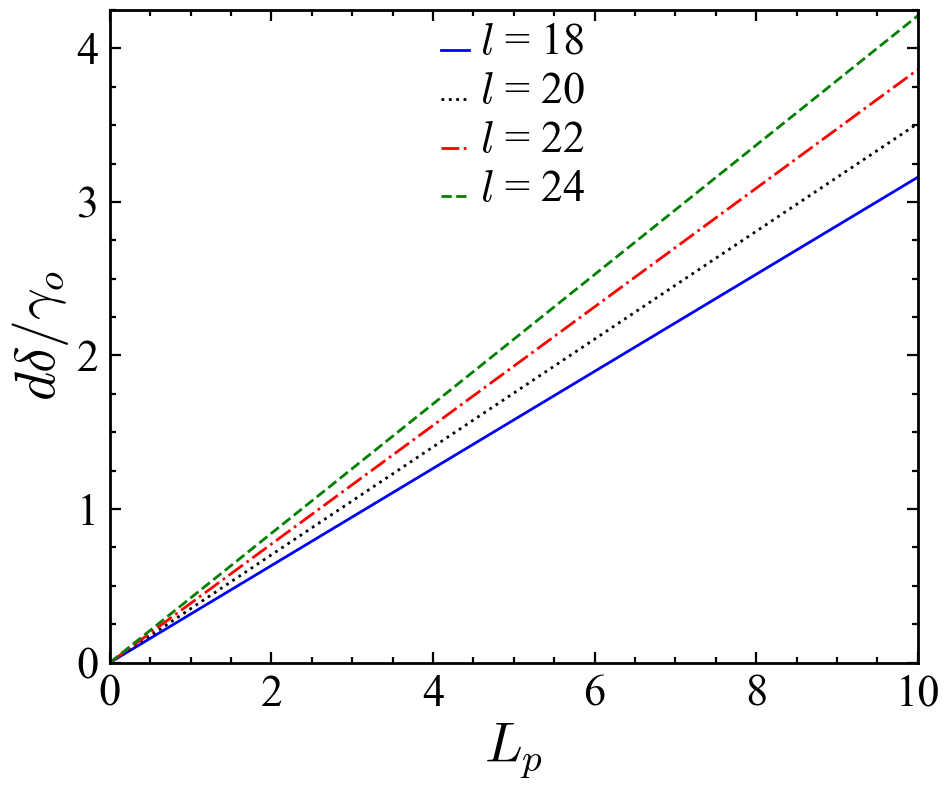

In [8]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/6',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -4.0,
            'max'   : 4.0,
            'dim'   : 800001
        },
        'Y'                 : {
            'var'   : 'L_p',
            'min'   : 0,
            'max'   : 10,
            'dim'   : 11
        },
        'Z'                 : {
            'var'   : 'l',
            'val'   : [18, 20, 22, 24]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 0.5e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'gamma_o',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'k', 'r', 'g'],
        'sizes'             : [2] * 4,
        'styles'            : ['-', ':', '-.', '--'],
        'x_label'           : '$L_{p}$',
        'x_ticks'           : [i * 2 for i in range(6)],
        'x_ticks_minor'     : [i * 0.5 for i in range(21)],
        'y_name'            : '$l$',
        'v_label'           : '$d \\delta / \\gamma_{o}$',
        'v_limits'          : [0.0, 4.25],
        'v_ticks'           : [i for i in range(5)],
        'v_ticks_minor'     : [i * 0.25 for i in range(18)],
        'show_legend'       : True,
        'legend_location'   : 'upper center',
        'label_font_size'   : 40.0,
        'legend_font_size'  : 32.0,
        'tick_font_size'    : 32.0,
        'width'             : 9.6,
        'height'            : 8.0
    }
}

# looper
looper = wrap_looper(
    looper_name='XYZLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system']
)
delta_norms = looper.axes['X']['val']
xs = looper.axes['Y']['val']
ys = looper.axes['Z']['val']
vs = looper.results['V']

# calculate peak differences
ddelta_norms = list()
for i in range(len(vs)):
    ddelta_norms_temp = list()
    for j in range(len(vs[0])):
        # for each transparency profile
        Ts = vs[i][j]
        dim = len(Ts)
        k = int(dim / 2) + 1 if dim % 2 == 0 else int(dim / 2)
        # locate change of derivative from positive to negative from center
        idxs = list()
        while k <= dim - 2 and len(idxs) < 2:
            if Ts[k] - Ts[k - 1] >= 0 and Ts[k + 1] - Ts[k] <= 0:
                idxs.append(k)
            if Ts[- k - 1] - Ts[- k] >= 0 and Ts[- k - 2] - Ts[- k - 1] <= 0:
                idxs.append(- k - 1)
            k += 1
        # update list with difference between peaks
        ddelta_norms_temp.append(np.abs(delta_norms[idxs[-1]] - delta_norms[idxs[0]]))
    # update main list
    ddelta_norms.append(ddelta_norms_temp)

# plotter
plotter = MPLPlotter(axes={
    'X': xs,
    'Y': ys
}, params=params['plotter'])
plotter.update(
    vs=ddelta_norms,
    xs=xs
)
plotter.show()

## Figure 7

Asymmetric Fano profiles obtained for $L_{p} = 0$ as a function of the pump-probe detuning and cavity detuning.
Here, $P_{lc} = 1$ fW, and the rest of the parameters are the same as in Figure 3.

MainThread               INFO    2024-01-18 22:59:17.676: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:17.683: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


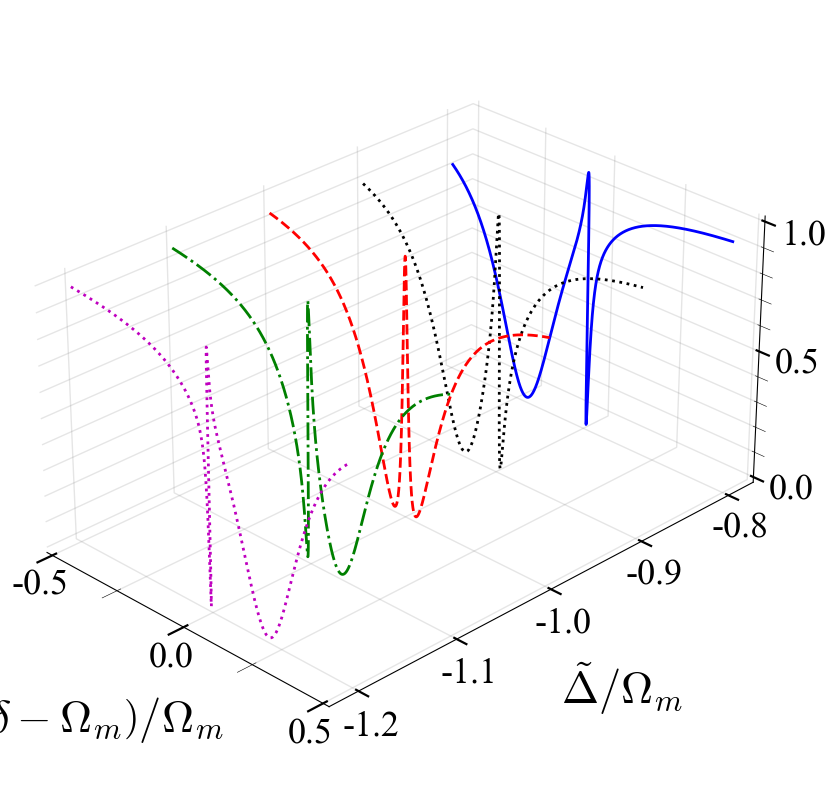

In [9]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/7',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.5,
            'max'   : 0.5,
            'dim'   : 10001
        },
        'Y'                 : {
            'var'   : 'Delta_tilde',
            'val'   : [-0.8, -0.9, -1.0, -1.1, -1.2]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 0,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines_3d',
        'colors'            : ['b', 'k', 'r', 'g', 'm'],
        'sizes'             : [2] * 5,
        'styles'            : ['-', ':', '--', '-.', ':'],
        'x_label_pad'       : 32,
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_pad'        : 0,
        'x_ticks'           : [-0.5, 0.0, 0.5],
        'x_ticks_minor'     : [i * 0.25 - 0.5 for i in range(5)],
        'y_label_pad'       : 48,
        'y_label'           : '$\\tilde{\\Delta} / \\Omega_{m}$',
        'y_limits'          : [-1.22, -0.78],
        'y_tick_labels'     : [-1.2, -1.1, -1.0, -0.9, -0.8],
        'y_tick_pad'        : 4,
        'y_ticks'           : [i * 0.1 - 1.2 for i in range(5)],
        'y_ticks_minor'     : [i * 0.1 - 1.2 for i in range(5)],
        'v_label_pad'       : 20,
        'v_label'           : '$T$',
        'v_tick_pad'        : 8,
        'v_ticks'           : [0.0, 0.5, 1.0],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'view_aspect'       : [1.0, 1.5, 0.75],
        'view_elevation'    : 28,
        'view_rotation'     : -45
    }
}

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 8

(a) Probe transmission as a function of pump-probe detuning and cavity detuning for $L_{p} = 1$.
(b) Transmission of the probe field obtained at $\tilde{\Delta} = -1.2 \Omega_{m}$ as a function of the winding number and pump-probe detuning.
Here, $P_{lc} = 1$ fW, and the other parameters are the same as in Figure 5.

MainThread               INFO    2024-01-18 22:59:18.368: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:18.377: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


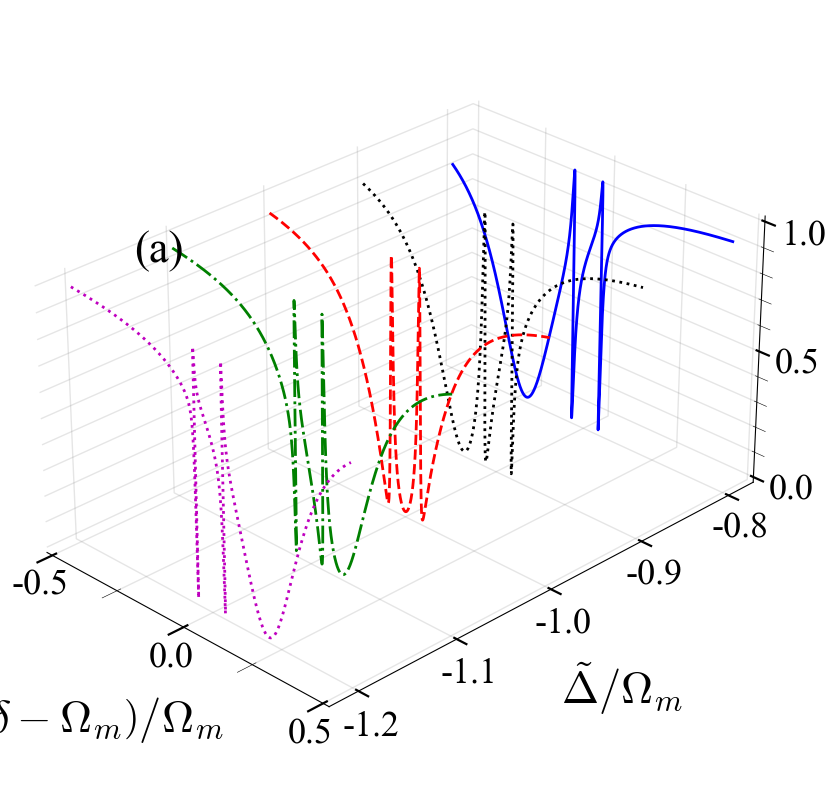

In [10]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/8a',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.5,
            'max'   : 0.5,
            'dim'   : 10001
        },
        'Y'                 : {
            'var'   : 'Delta_tilde',
            'val'   : [-0.8, -0.9, -1.0, -1.1, -1.2]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines_3d',
        'colors'            : ['b', 'k', 'r', 'g', 'm'],
        'sizes'             : [2] * 5,
        'styles'            : ['-', ':', '--', '-.', ':'],
        'x_label_pad'       : 32,
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_pad'        : 0,
        'x_ticks'           : [-0.5, 0.0, 0.5],
        'x_ticks_minor'     : [i * 0.25 - 0.5 for i in range(5)],
        'y_label_pad'       : 48,
        'y_label'           : '$\\tilde{\\Delta} / \\Omega_{m}$',
        'y_limits'          : [-1.22, -0.78],
        'y_tick_labels'     : [-1.2, -1.1, -1.0, -0.9, -0.8],
        'y_tick_pad'        : 4,
        'y_ticks'           : [i * 0.1 - 1.2 for i in range(5)],
        'y_ticks_minor'     : [i * 0.1 - 1.2 for i in range(5)],
        'v_label_pad'       : 20,
        'v_label'           : '$T$',
        'v_tick_pad'        : 8,
        'v_ticks'           : [0.0, 0.5, 1.0],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'view_aspect'       : [1.0, 1.5, 0.75],
        'view_elevation'    : 28,
        'view_rotation'     : -45,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.14, 0.66)
        }]
    }
}

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

MainThread               INFO    2024-01-18 22:59:18.704: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:18.715: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


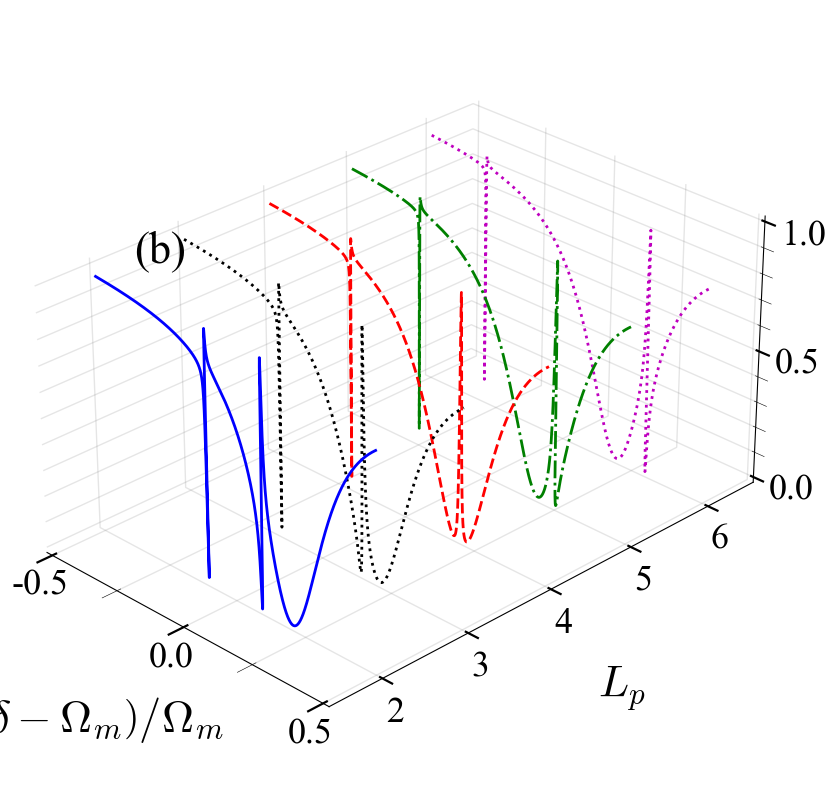

In [11]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/8b',
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.5,
            'max'   : 0.5,
            'dim'   : 10001
        },
        'Y'                 : {
            'var'   : 'L_p',
            'val'   : [6, 5, 4, 3, 2]
        }
    },
    'system': {
        'Delta_tilde'   : -1.2,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines_3d',
        'colors'            : ['m', 'g', 'r', 'k', 'b'],
        'sizes'             : [2] * 5,
        'styles'            : [':', '-.', '--', ':', '-'],
        'x_label_pad'       : 32,
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_pad'        : 0,
        'x_ticks'           : [-0.5, 0.0, 0.5],
        'x_ticks_minor'     : [i * 0.25 - 0.5 for i in range(5)],
        'y_label_pad'       : 48,
        'y_label'           : '$L_{p}$',
        'y_limits'          : [1.5, 6.5],
        'y_tick_labels'     : [2, 3, 4, 5, 6],
        'y_tick_pad'        : 4,
        'y_ticks'           : [2, 3, 4, 5, 6],
        'y_ticks_minor'     : [2, 3, 4, 5, 6],
        'v_label_pad'       : 20,
        'v_label'           : '$T$',
        'v_tick_pad'        : 8,
        'v_ticks'           : [0.0, 0.5, 1.0],
        'v_ticks_minor'     : [i * 0.1 for i in range(11)],
        'label_font_size'   : 32.0,
        'tick_font_size'    : 26.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'view_aspect'       : [1.0, 1.5, 0.75],
        'view_elevation'    : 28,
        'view_rotation'     : -45,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.14, 0.66)
        }]
    }
}

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 9

(a) Transmission phase and (b) group delay as a function of pump-probe detuning.
Here, $L_{p} = 0$ (dashed blue curve) and $L_{p} = 1$ (solid red curve).
The parameters used are the same as in Figure 5.

MainThread               INFO    2024-01-18 22:59:19.011: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:19.016: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


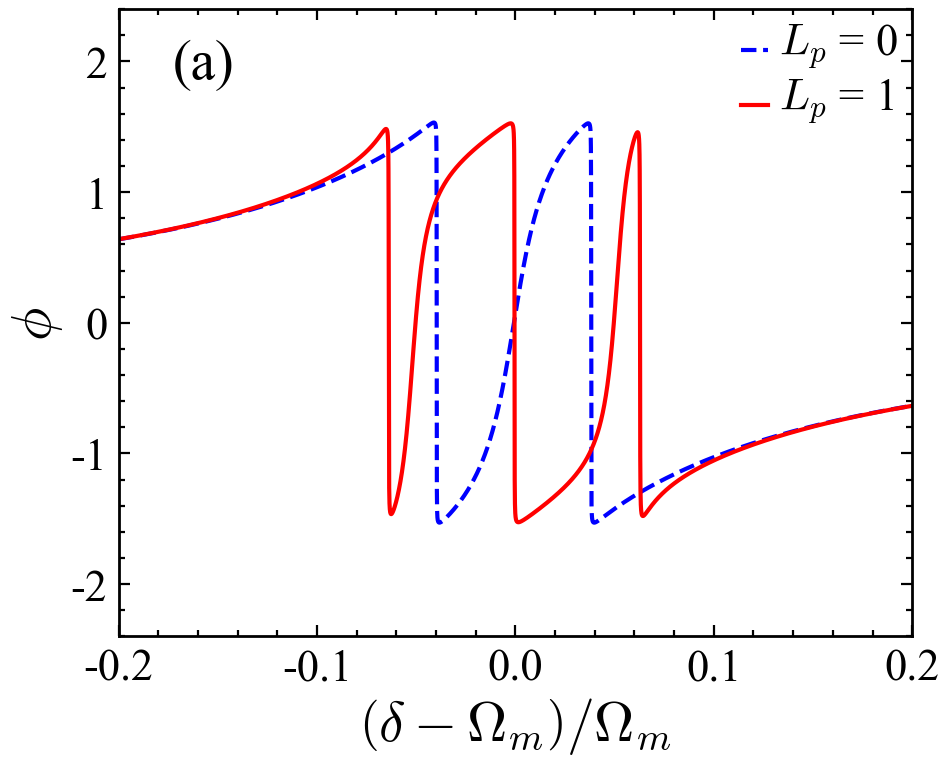

In [12]:
# all parameters
params = {
    'looper': {
        'show_progress' : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/9a',
        'X'             : {
            'var'   : 'delta',
            'min'   : -0.2,
            'max'   : 0.2,
            'dim'   : 10001
        },
        'Y'             : {
            'var'   : 'L_p',
            'val'   : [0, 1]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r'],
        'sizes'             : [3] * 2,
        'styles'            : ['--', '-'],
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_labels'     : [-0.2, -0.1, 0.0, 0.1, 0.2],
        'x_ticks'           : [i * 0.1 - 0.2 for i in range(5)],
        'x_ticks_minor'     : [i * 0.02 - 0.2 for i in range(21)],
        'y_name'            : '$L_{p}$',
        'v_label'           : '$\\phi$',
        'v_limits'          : [-2.4, 2.4],
        'v_ticks'           : [i - 2 for i in range(5)],
        'v_ticks_minor'     : [i * 0.2 - 2.4 for i in range(25)],
        'show_legend'       : True,
        'legend_location'   : 'upper right',
        'label_font_size'   : 40.0,
        'legend_font_size'  : 32.0,
        'tick_font_size'    : 32.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.18, 0.86)
        }],
    }
}

# function to obtain the transmission phase
def func_transmission_phase(system_params):
    # initialize system
    system = BEC_10(
        params=system_params
    )
    # extract parameters
    _, _, c = system.get_ivc()
    # return transmission phase
    return system.get_transmission_phase(
        c=c
    )

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission_phase,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

MainThread               INFO    2024-01-18 22:59:19.438: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	


MainThread               INFO    2024-01-18 22:59:19.507: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


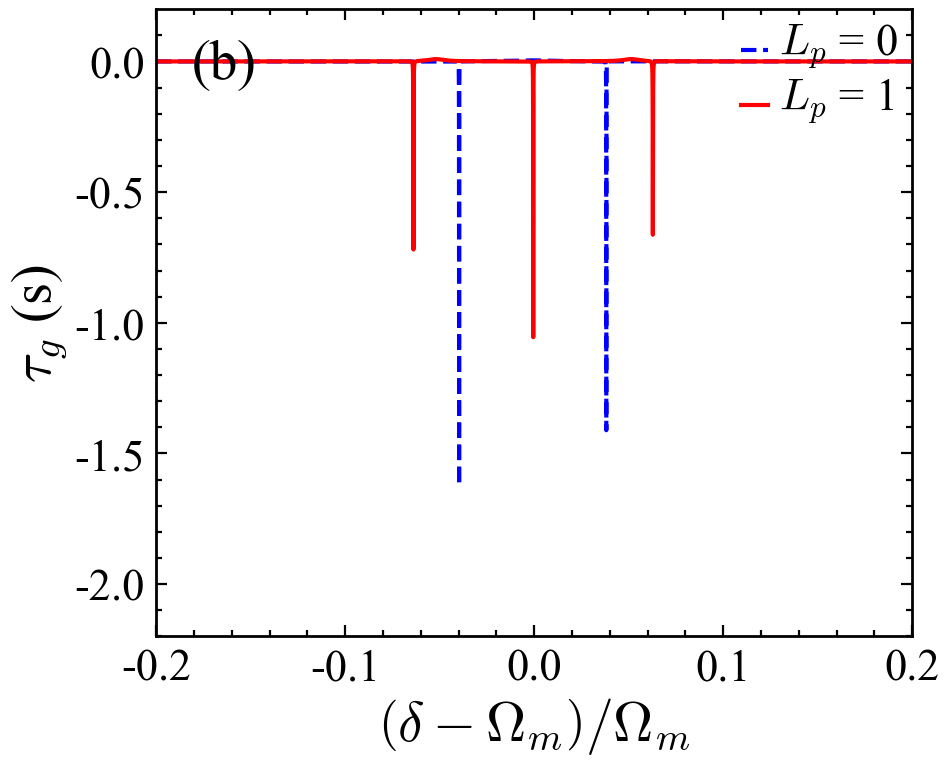

In [13]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/9b',
        'grad'              : True,
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.2,
            'max'   : 0.2,
            'dim'   : 400001
        },
        'Y'                 : {
            'var'   : 'L_p',
            'val'   : [0, 1]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'none',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'r'],
        'sizes'             : [3] * 2,
        'styles'            : ['--', '-'],
        'x_label'           : '$\\left( \\delta - \\Omega_{m} \\right) / \\Omega_{m}$',
        'x_tick_labels'     : [-0.2, -0.1, 0.0, 0.1, 0.2],
        'x_ticks'           : [i * 0.1 - 0.2 for i in range(5)],
        'x_ticks_minor'     : [i * 0.02 - 0.2 for i in range(21)],
        'y_name'            : '$L_{p}$',
        'v_label'           : '$\\tau_{g}$ (s)',
        'v_limits'          : [-2.2, 0.2],
        'v_ticks'           : [i * 0.5 - 2 for i in range(5)],
        'v_ticks_minor'     : [i * 0.1 - 2.4 for i in range(26)],
        'show_legend'       : True,
        'legend_location'   : 'upper right',
        'label_font_size'   : 40.0,
        'legend_font_size'  : 32.0,
        'tick_font_size'    : 32.0,
        'width'             : 9.6,
        'height'            : 8.0,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.2, 0.86)
        }],
    }
}

# function to obtain the normalized transmission phase
def func_transmission_phase_norm(system_params):
    # initialize system
    system = BEC_10(
        params=system_params
    )
    # extract parameters
    _, _, c = system.get_ivc()
    # get transmission phase
    phi = system.get_transmission_phase(
        c=c
    )
    # normalize by additive detuning
    _, Omegas, _, _ = system.get_effective_values(
        c=c
    )
    return phi / (Omegas[0] + Omegas[1]) * 2

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission_phase_norm,
    params=params['looper'],
    params_system=params['system'],
    plot=True,
    params_plotter=params['plotter']
)

## Figure 10

Group delay as a function of (a) control power for different $L_{p}$ and (b) winding number for different power values of the control beam.
Here, group delay is obtained at $\delta = \Omega_{m}$, and the rest of the parameters are the same as in Figure 9.

MainThread               INFO    2024-01-18 22:59:21.769: (qom.loopers.XYLooper) ---------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:27.237: (qom.loopers.XYLooper) -------------------------------------------Results Loaded	


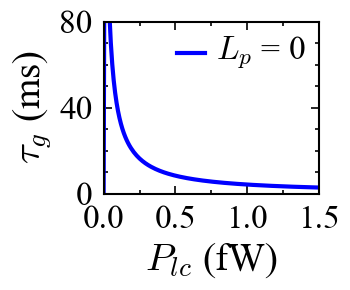

In [14]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/10a_inset',
        'grad'              : True,
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.002,
            'max'   : 0.002,
            'dim'   : 400001
        },
        'Y'                 : {
            'var'   : 'P_lc',
            'min'   : 0.0e-15,
            'max'   : 1.5e-15,
            'dim'   : 151
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 0,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'res',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b'],
        'sizes'             : [3],
        'x_label'           : '$P_{lc}$ (fW)',
        'x_tick_labels'     : [0.0, 0.5, 1.0, 1.5],
        'x_ticks'           : [i * 0.5e-15 for i in range(4)],
        'x_ticks_minor'     : [i * 0.25e-15 for i in range(7)],
        'y_name'            : '$L_{p}$',
        'v_label'           : '$\\tau_{g}$ (ms)',
        'v_tick_labels'     : [i * 40 for i in range(3)],
        'v_ticks'           : [i * 40e-3 for i in range(3)],
        'v_ticks_minor'     : [i * 10e-3 for i in range(9)],
        'show_legend'       : True,
        'legend_location'   : 'upper right',
        'label_font_size'   : 28.0,
        'legend_font_size'  : 24.0,
        'tick_font_size'    : 24.0,
        'width'             : 3.6,
        'height'            : 3.0
    }
}

# looper
looper = wrap_looper(
    looper_name='XYLooper',
    func=func_transmission_phase_norm,
    params=params['looper'],
    params_system=params['system']
)
xs = looper.axes['Y']['val']
vs = [[np.max(v) for v in looper.results['V']]]

# plotter
plotter = MPLPlotter(axes={
    'X': xs,
    'Y': [0]
}, params=params['plotter'])
plotter.update(
    vs=vs,
    xs=xs
)
plotter.show()

MainThread               INFO    2024-01-18 22:59:31.114: (qom.loopers.XYZLooper) --------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 22:59:47.414: (qom.loopers.XYZLooper) ------------------------------------------Results Loaded	


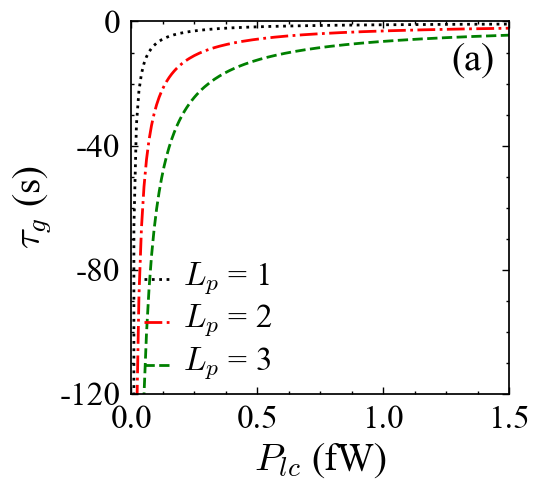

In [15]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/10a',
        'grad'              : True,
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.002,
            'max'   : 0.002,
            'dim'   : 400001
        },
        'Y'                 : {
            'var'   : 'P_lc',
            'min'   : 0.0e-15,
            'max'   : 1.5e-15,
            'dim'   : 151
        },
        'Z'                 : {
            'var'   : 'L_p',
            'val'   : [1, 2, 3]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'res',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['k', 'r', 'g'],
        'sizes'             : [2] * 3,
        'styles'            : [':', '-.', '--'],
        'x_label'           : '$P_{lc}$ (fW)',
        'x_tick_labels'     : [0.0, 0.5, 1.0, 1.5],
        'x_ticks'           : [i * 0.5e-15 for i in range(4)],
        'x_ticks_minor'     : [i * 0.125e-15 for i in range(13)],
        'y_name'            : '$L_{p}$',
        'v_label'           : '$\\tau_{g}$ (s)',
        'v_ticks'           : [i * 40 - 120 for i in range(4)],
        'v_ticks_minor'     : [i * 10 - 120 for i in range(13)],
        'show_legend'       : True,
        'legend_location'   : 'lower left',
        'label_font_size'   : 28.0,
        'legend_font_size'  : 24.0,
        'tick_font_size'    : 24.0,
        'width'             : 5.5,
        'height'            : 5.0,
        'annotations'       : [{
            'text'  : '(a)',
            'xy'    : (0.82, 0.84)
        }]
    }
}

# looper
looper = wrap_looper(
    looper_name='XYZLooper',
    func=func_transmission_phase_norm,
    params=params['looper'],
    params_system=params['system']
)
xs = looper.axes['Y']['val']
ys = looper.axes['Z']['val']
vs = [[np.min(col) for col in row] for row in looper.results['V']]

# plotter
plotter = MPLPlotter(axes={
    'X': xs,
    'Y': ys
}, params=params['plotter'])
plotter.update(
    vs=vs,
    xs=xs
)
plotter.show()

MainThread               INFO    2024-01-18 22:59:58.067: (qom.loopers.XYZLooper) --------------------------------------Looper Initialized	
MainThread               INFO    2024-01-18 23:00:12.531: (qom.loopers.XYZLooper) ------------------------------------------Results Loaded	


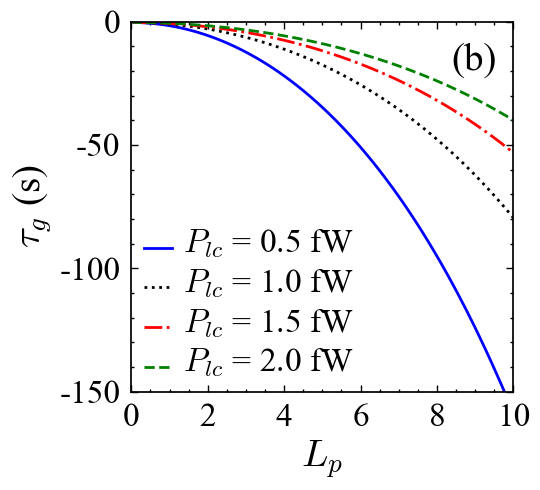

In [16]:
# all parameters
params = {
    'looper': {
        'show_progress'     : True,
        'file_path_prefix'  : '../../data/v3.5_qom-v1.0.1/10b',
        'grad'              : True,
        'X'                 : {
            'var'   : 'delta',
            'min'   : -0.002,
            'max'   : 0.002,
            'dim'   : 400001
        },
        'Y'                 : {
            'var'   : 'L_p',
            'min'   : 0,
            'max'   : 10,
            'dim'   : 101
        },
        'Z'                 : {
            'var'   : 'P_lc',
            'val'   : [0.5e-15, 1e-15, 1.5e-15, 2e-15]
        }
    },
    'system': {
        'Delta_tilde'   : -1.0,
        'delta'         : 0.0,
        'G'             : 2 * np.pi * 1e3,
        'g_tilde_norm'  : 0.0,
        'gamma_m'       : 2 * np.pi * 0.8,
        'gamma_o'       : 2 * np.pi * 1e3,
        'k'             : 1,
        'L_p'           : 1,
        'l'             : 20,
        'lambda_lc'     : 589e-9,
        'm'             : 23,
        'mu'            : 0.5,
        'N'             : 1e4,
        'P_lc'          : 1e-15,
        'P_lp_norm'     : 0.01,
        'R'             : 10e-6,
        't_approx'      : 'res',
        't_Delta_norm'  : 'Omega_m',
        't_Delta_offset': 'zero',
        't_delta_norm'  : 'Omega_m',
        't_delta_offset': 'Omega_m',
        't_line'        : 's',
        't_oss_method'  : 'basic',
        't_P_lc_norm'   : 'none'
    },
    'plotter': {
        'type'              : 'lines',
        'colors'            : ['b', 'k', 'r', 'g'],
        'sizes'             : [2] * 4,
        'styles'            : ['-', ':', '-.', '--'],
        'x_label'           : '$L_{p}$',
        'x_ticks'           : [i * 2 for i in range(6)],
        'x_ticks_minor'     : [i * 0.5 for i in range(21)],
        'y_name'            : '$P_{lc}$',
        'y_unit'            : 'fW',
        'v_label'           : '$\\tau_{g}$ (s)',
        'v_ticks'           : [-i * 50 for i in range(4)],
        'v_ticks_minor'     : [-i * 10 for i in range(16)],
        'show_legend'       : True,
        'legend_location'   : 'lower left',
        'label_font_size'   : 28.0,
        'legend_font_size'  : 24.0,
        'tick_font_size'    : 24.0,
        'width'             : 5.5,
        'height'            : 5.0,
        'annotations'       : [{
            'text'  : '(b)',
            'xy'    : (0.82, 0.84)
        }]
    }
}

# looper
looper = wrap_looper(
    looper_name='XYZLooper',
    func=func_transmission_phase_norm,
    params=params['looper'],
    params_system=params['system']
)
xs = looper.axes['Y']['val']
vs = [[np.min(col) for col in row] for row in looper.results['V']]

# plotter
plotter = MPLPlotter(axes={
    'X': xs,
    'Y': [0.5, 1.0, 1.5, 2.0]
}, params=params['plotter'])
plotter.update(
    vs=vs,
    xs=xs
)
plotter.show()